# Frequency Response

In this notebook, the frequency domain of images will be explored. You can use all functions and libraries that you need to achieve this exercise.

## Fast Fourier Transform with numpy - get to know the basic functions

Using either [OpenCV or Numpy](https://docs.opencv.org/4.x/de/dbc/tutorial_py_fourier_transform.html), create the fourier transform of an image of your choice and visualize both magnitude and phase information of the complex FFT result. Make sure to shift the zero-frequency component (DC component) to the center of the image before visualizing. Finally, reconstruct the image with the inverse fourier transform, and show the reconstructed image.

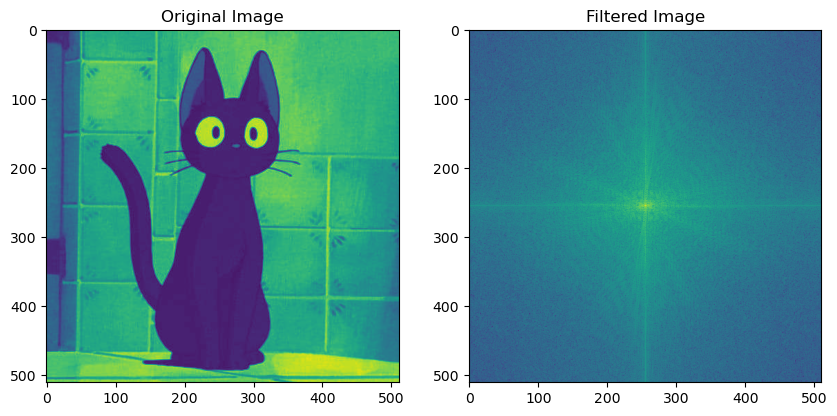

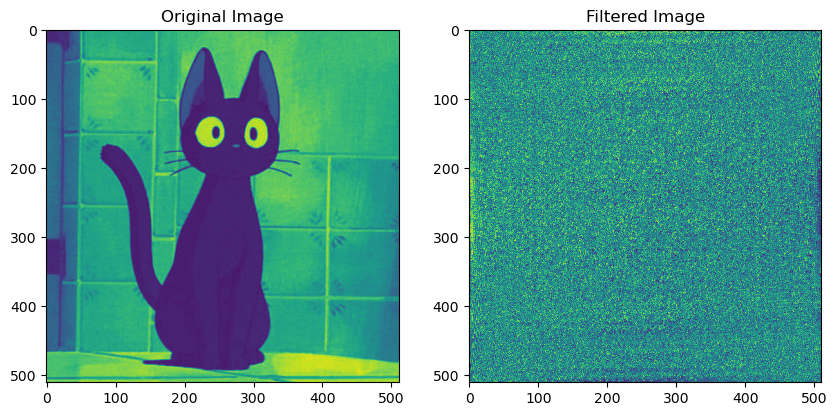

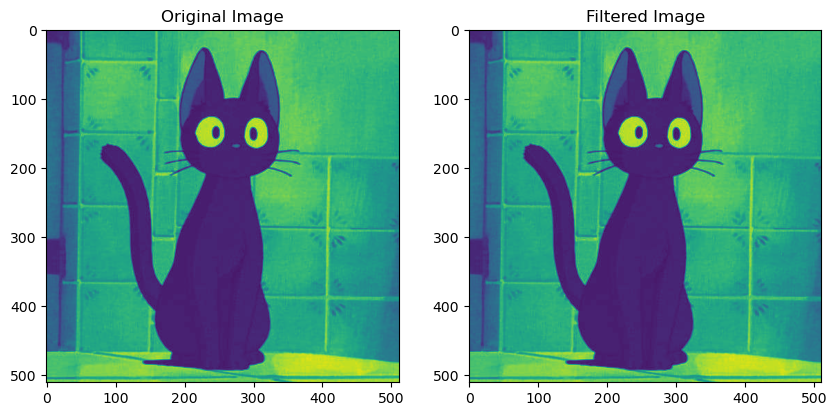

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
def loadImage(path, resizeFactor):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    height, width = image.shape  # Number of rows and columns in the image
    image = cv2.resize(image, (int(width * resizeFactor), int(height * resizeFactor)))
    return image

def showImage(image, image2):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    # plt.imshow(image)
    plt.imshow(image)
    plt.title('Original Image')
    plt.subplot(1, 2, 2)
    plt.imshow(image2)
    plt.title('Filtered Image')
    return plt.show()

image = loadImage('ressources/jiji.jpg', 1)

f = np.fft.fft2(image)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

image_phase = np.angle(f)

f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)


showImage(image, magnitude_spectrum)
showImage(image, image_phase)
showImage(image, img_back)

## FFTs of different  image types

Experiment with different types of images:
* images of nature (animals, landscapes etc.)
* images of buildings
* geometric pattern images (try to find images with varying sizes of the same pattern!)

For each of your images, apply the FFT and show the results (the magnitude spectrum is sufficient) - they will look very different. Explain how the fourier transformed image relates to the respective input image, and why/how the fourier transformed images differ from each other.

C:\Users\jenny\AppData\Local\Temp\ipykernel_26080\2186025634.py:9: RuntimeWarning: divide by zero encountered in log
  magnitude_spectrum = 20*np.log(np.abs(fshift))


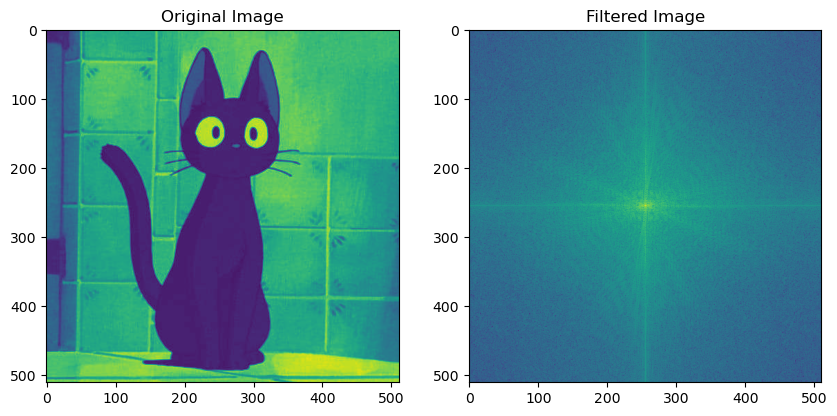

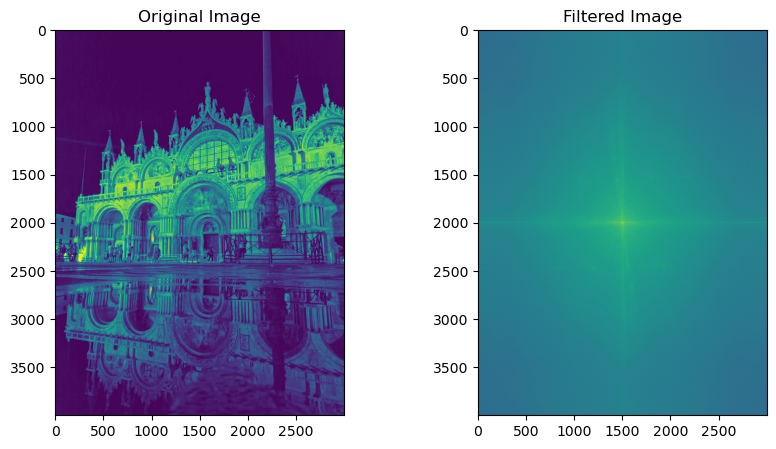

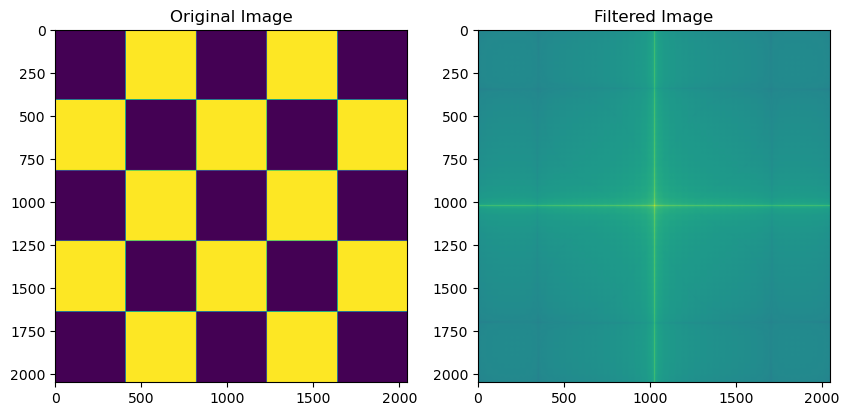

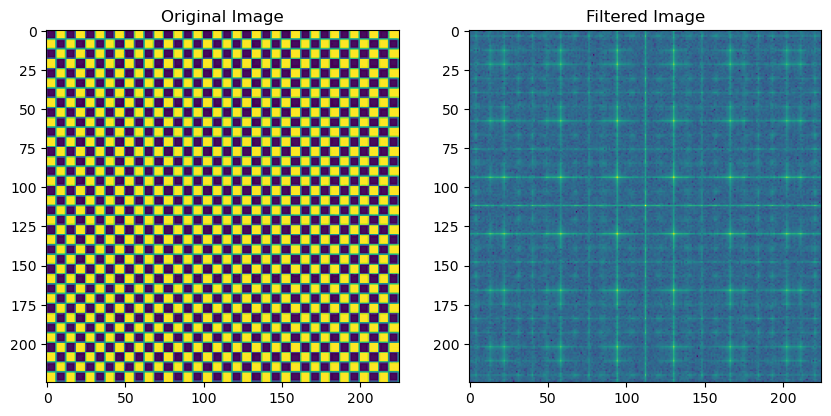

In [5]:

image = loadImage('ressources/jiji.jpg', 1)
image_building = loadImage('ressources/venedig.jpg', 1)
image_pattern = loadImage('ressources/Checkerboard_pattern.png', 1)
image_pattern_small = loadImage('ressources/pattern_small.png', 1)

def apply_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    return magnitude_spectrum
    
magni = apply_fft(image)
magni_building = apply_fft(image_building)
magni_pattern = apply_fft(image_pattern)
magni_pattern_small = apply_fft(image_pattern_small)

showImage(image, magni)
showImage(image_building, magni_building)
showImage(image_pattern, magni_pattern)
showImage(image_pattern_small, magni_pattern_small)

## FFT of image vs. FFT of blurred image

Load an image and apply a large blur to it (*cv2.blur* for speed).
Create the FFT for both images, and visualize the magnitude spectrum. Explain the differences.

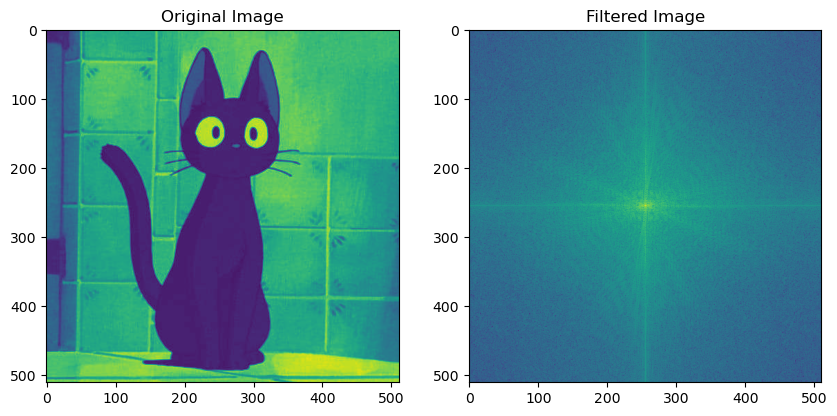

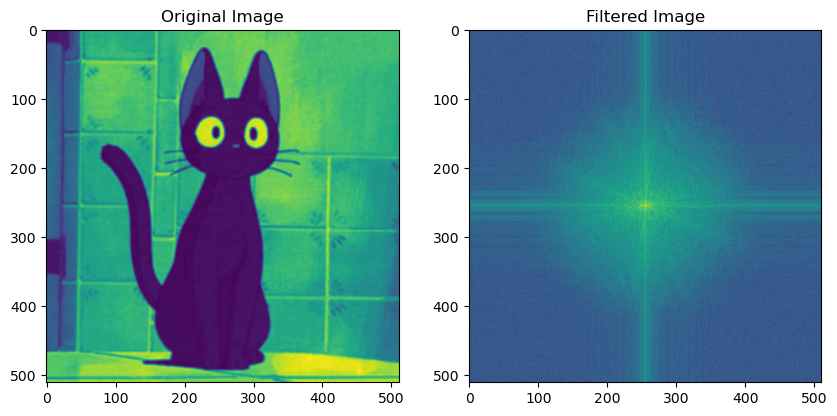

In [11]:
image = loadImage('ressources/jiji.jpg', 1)

magni = apply_fft(image)

kernel_size = (5, 5)  # Adjust the kernel size as needed
blurred_image = cv2.GaussianBlur(image, kernel_size, 0)
magni_blur = apply_fft(blurred_image)


showImage(image, magni)
showImage(blurred_image, magni_blur)

## Filtering in the Fourier Domain

Follow [this tutorial](https://www.kaggle.com/code/muhammadahmed26/image-processing-with-python/notebook) to create a gaussian low pass filter and apply it to a fourier transformed image, then apply the inverse fourier transformation to the filtered image.
Visualize the magnitude spectrum of
* the filter kernel
* the image
* the filtered image.

and show the filtered image in the spatial domain.

In [15]:
import math
def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base

def distance(point1,point2):
    return math.sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def gaussianLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

def gaussianHP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            base[y,x] = 1 - math.exp(((-distance((y,x),center)**2)/(2*(D0**2))))
    return base

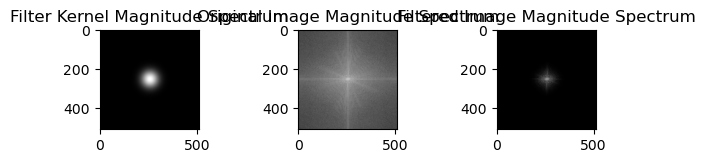

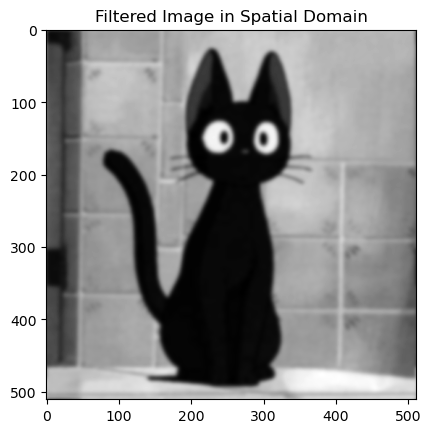

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'ressources/jiji.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Ensure the image is valid
if original_image is None:
    raise ValueError("Image not loaded. Check the file path.")

# Apply Fourier Transform
f_transform = np.fft.fft2(original_image)
f_transform_shifted = np.fft.fftshift(f_transform)

# Create a Gaussian low-pass filter
rows, cols = original_image.shape
crow, ccol = rows // 2, cols // 2
d = 30  # Adjust the standard deviation (sigma) as needed

# Create a 2D Gaussian filter
x = np.arange(0, cols, 1)
y = np.arange(0, rows, 1)
x, y = np.meshgrid(x, y)
low_pass_filter = np.exp(-((x - crow) ** 2 + (y - ccol) ** 2) / (2 * d ** 2))

# Normalize the filter to have values between 0 and 1
low_pass_filter = low_pass_filter / np.sum(low_pass_filter)

# Apply the filter to the Fourier-transformed image
filtered_transform = f_transform_shifted * low_pass_filter

# Apply Inverse Fourier Transform
filtered_image = np.fft.ifft2(np.fft.ifftshift(filtered_transform)).real

# Visualize the magnitude spectrum of the filter kernel, the original image, and the filtered image
plt.subplot(131), plt.imshow(np.log(1 + np.abs(low_pass_filter)), cmap='gray')
plt.title('Filter Kernel Magnitude Spectrum')
plt.subplot(132), plt.imshow(np.log(1 + np.abs(f_transform_shifted)), cmap='gray')
plt.title('Original Image Magnitude Spectrum')
plt.subplot(133), plt.imshow(np.log(1 + np.abs(filtered_transform)), cmap='gray')
plt.title('Filtered Image Magnitude Spectrum')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=1)  # You can adjust the value of wspace as needed

# Display the filtered image in the spatial domain
plt.figure()  # Create a new figure for the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image in Spatial Domain')

# Show the plots
plt.show()


The End!